Credit card fraud prediction using KNN, Decision trees and logistic regression classifiers. This is a competition on Kaggle which can be found on https://www.kaggle.com/mlg-ulb/creditcardfraud . The has been transformed using PCA

In [1]:
#Import all the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report 


In [2]:
#getting the credit card Competition data from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

df=pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

As the data has beeen transformed using PCA there are no null values and the data is normarlly distributed


In [5]:
#change the type of class into from int to category

df['Class'] = df['Class'].astype('category')



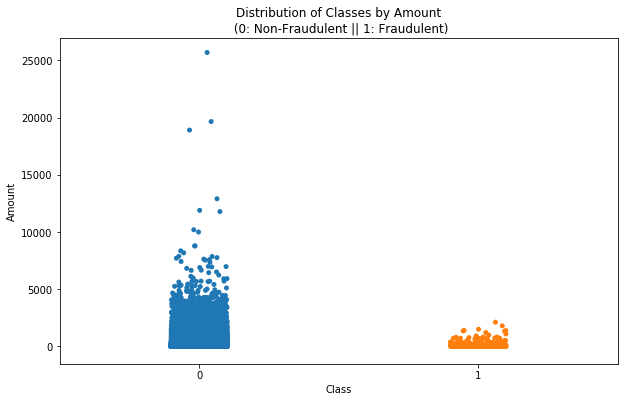

In [6]:
# plotting the classed against the amount of transactions
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes by Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

Fraudulent transactions don't have any abnormal amount of transactions 

In [7]:
""" The column time does not have any impact on the classification on the transaction as it only states

the seconds elapsed between each transaction and the first transaction in the dataset. We can drop it"""



df=df.drop('Time',axis=1)
df.shape

(284807, 30)

In [27]:
#separating data into features and targets

y=df['Class'].values
X=df.drop('Class',axis=1).values

print(y.shape)
print(X.shape)

print(df['Class'].value_counts())

(284807,)
(284807, 29)
0    284315
1       492
Name: Class, dtype: int64


We have imbalanced data( the fradulent data is to low compared to actual transactions) and this may cause a problem when training our models.

In [9]:
#split into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [23]:
# creating a list of classifiers for comparison

names=['Logistic Regression','KNN','Decision Tree']
classifiers=[LogisticRegression(penalty='l2',C=0.01,max_iter=1000),
             KNeighborsClassifier(n_neighbors=3),
             DecisionTreeClassifier(max_depth=5)]


# Model fitting and performance evaluation

We are going to train the data with the different classifiers as specified above. in the loop below we will also measure performance of our model using different metrics.

1. Accuracy
2. Precision
3. AUC
4. Recall
5. f1_score

In [25]:
#Train and report the performance evaluation metrics    
for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('-------------------------',name,'-------------------------')
    print(name ,'AUC:',auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
   

------------------------- Logistic Regression -------------------------
Logistic Regression AUC: 0.9742333659687848
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.61      0.72        98

    accuracy                           1.00     56962
   macro avg       0.93      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962

------------------------- KNN -------------------------
KNN AUC: 0.8774426343412999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.67      0.79        98

    accuracy                           1.00     56962
   macro avg       0.97      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962

------------------------- Decision Tree -------------------------
Decision Tree AUC: 0.8824288420348444
              precision    recall  f1-scor

# Analyzing performance metrics

For Logistic regression the AUC is high which is good but recall is very low and this is the value we want to increase as it represents the number of true positives divided by the number of positive values in the test data.For KNN and Decisiontrees both AUC and Recall are low.

This is caused by imbalanced data as mentionned above.To resolve this we will have to oversample data by creating synthentic data for the minority class. we will use ADASYN from library imblearn which is a method that generates synthetic data for the minority class

In [29]:
#import ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)


In [30]:
# training classifiers on over sampled data
for name,clf in zip(names,classifiers):
    clf.fit(X_ada,y_ada)
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('-------------------------',name,'-------------------------')
    print(name ,'AUC:',auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
   

------------------------- Logistic Regression -------------------------
Logistic Regression AUC: 0.9596554399756527
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.88      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962

------------------------- KNN -------------------------
KNN AUC: 0.9123922061086674
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.80      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962

------------------------- Decision Tree -------------------------
Decision Tree AUC: 0.9286323508722565
              precision    recall  f1-scor

Based on the result above the classifier to use for this prediction is KNN even if it has low AUC compared to the others but it has high f1_score which is the average between precision and recall.